In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

groups = ["control", "PD-1", "LTBR", "PD1+LTBR"]
sample_number = [5, 5, 4, 5]
data = pd.read_excel('/Users/yuey2/Desktop/demo/demo.xlsx', index_col=0)
cell_type = data.columns[:]

In [2]:
data['Group'] = ''
start = 0
for group, size in zip(groups, sample_number):
    end = start + size
    data['Group'][start:end] = group
    start = end

/var/folders/56/k3j8nxjs0yb5sl_rjhv3gggh0000gn/T/ipykernel_43071/1735301749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Group'][start:end] = group


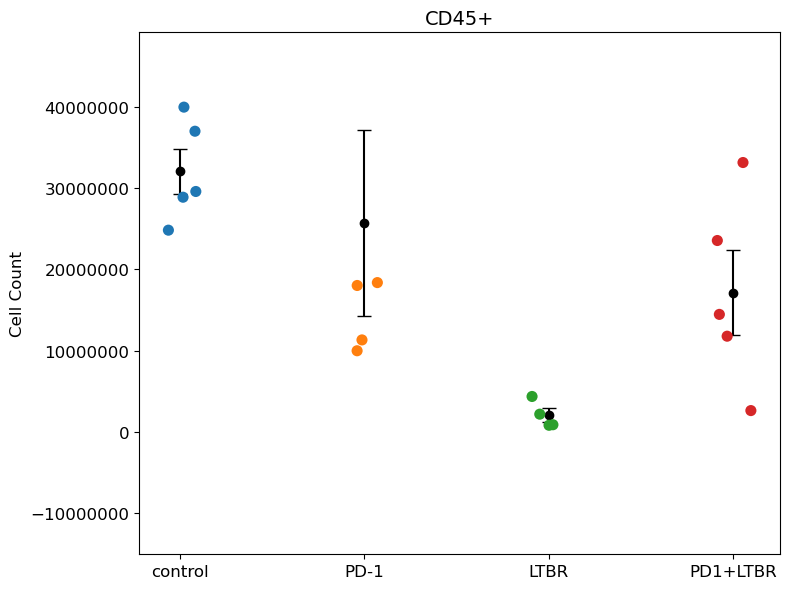

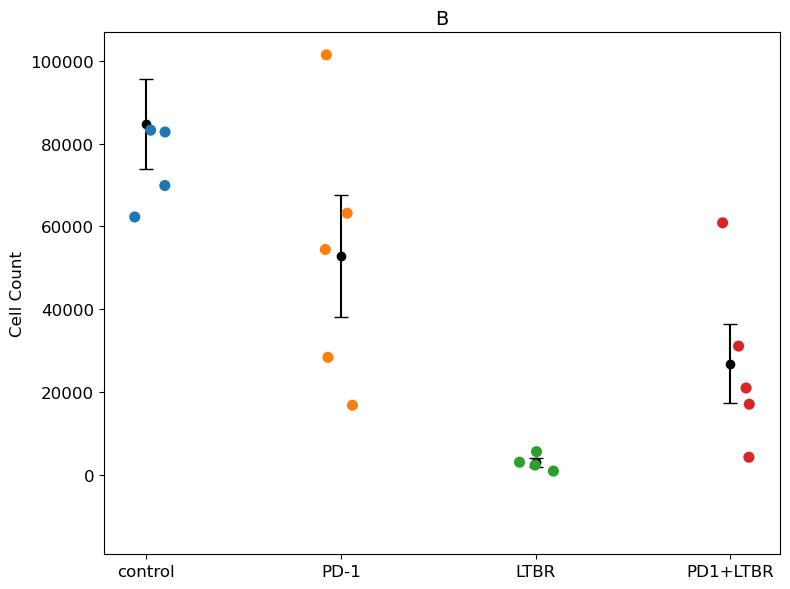

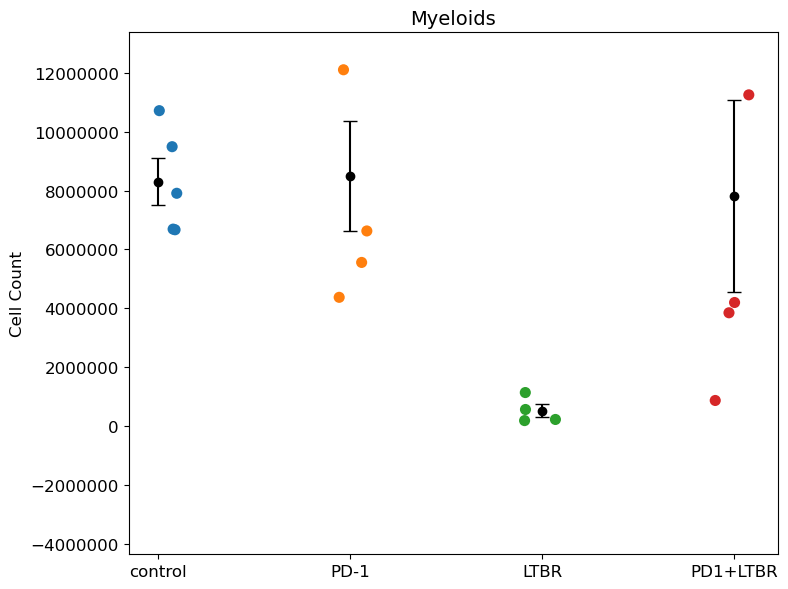

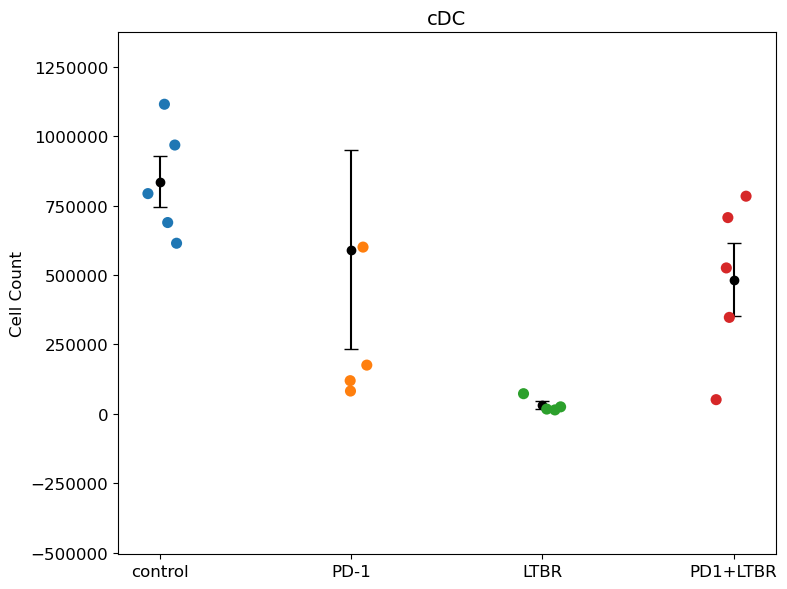

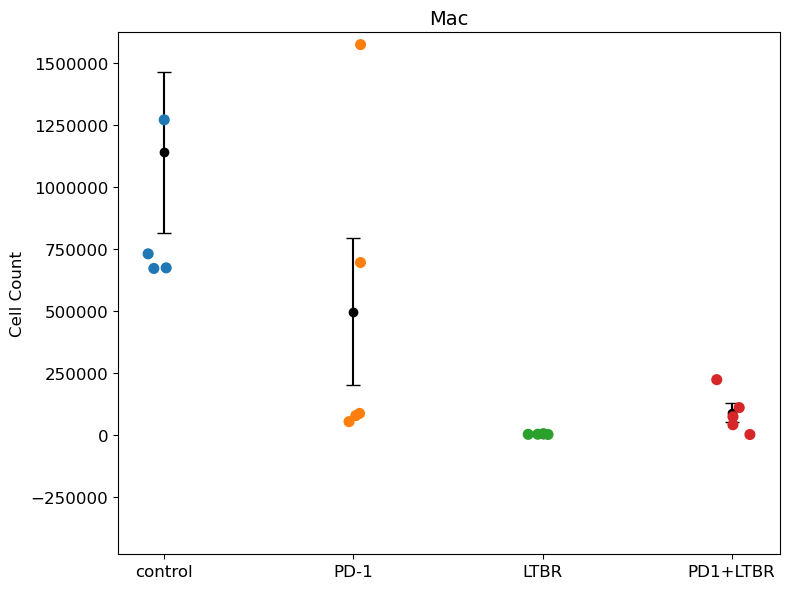

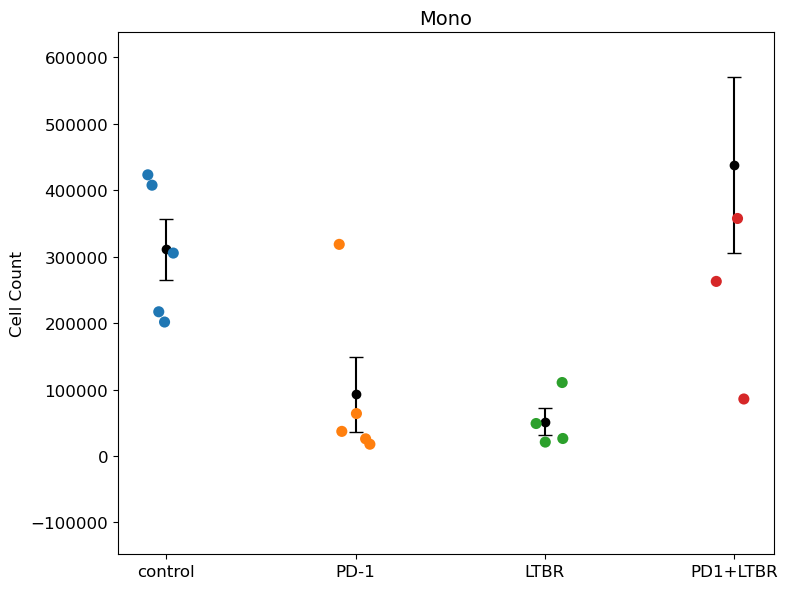

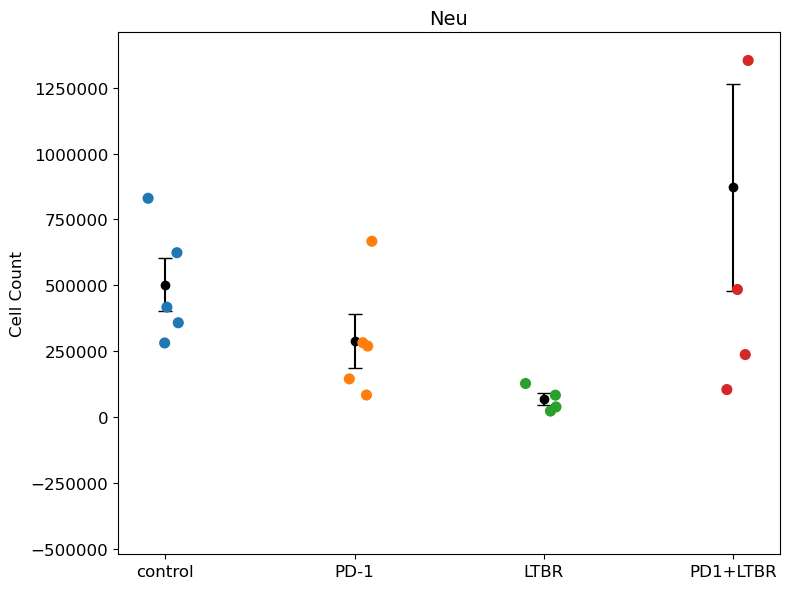

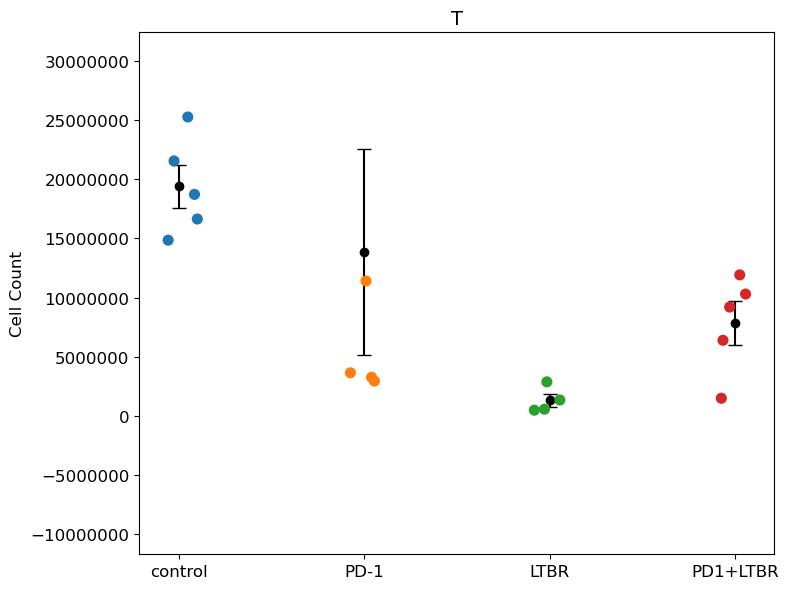

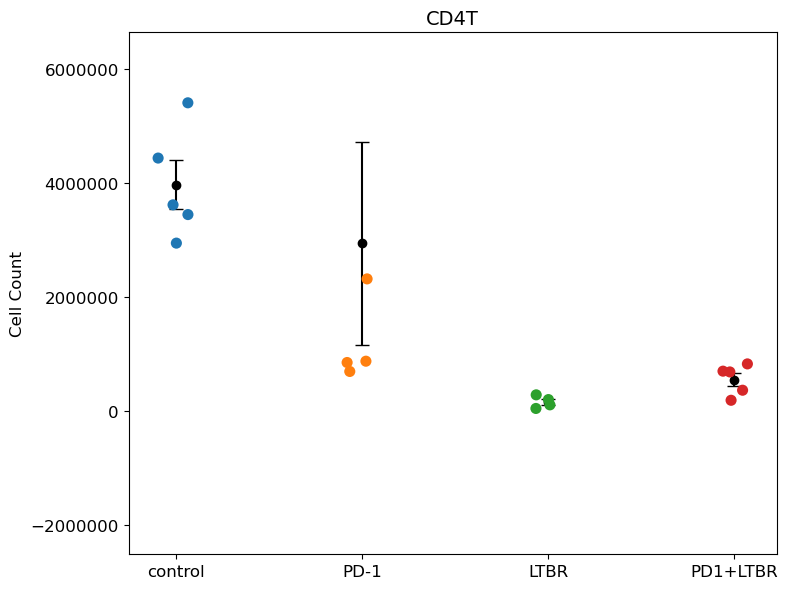

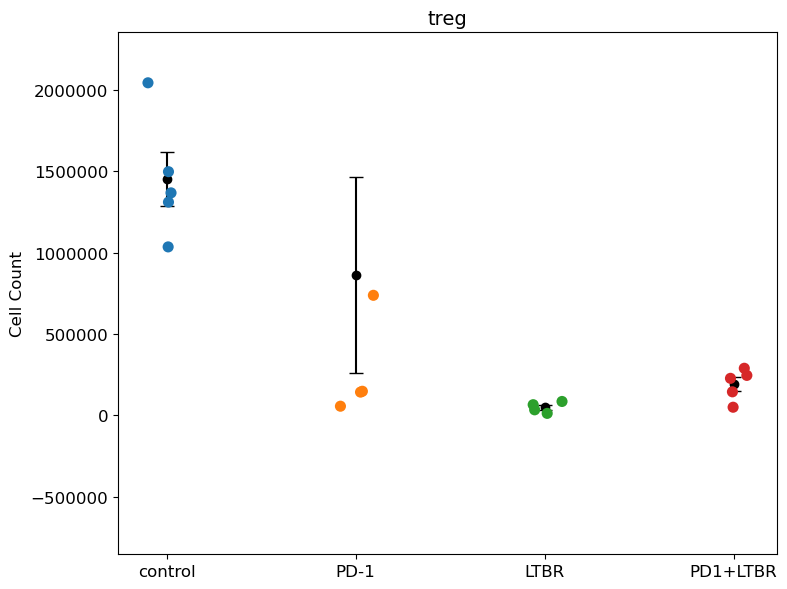

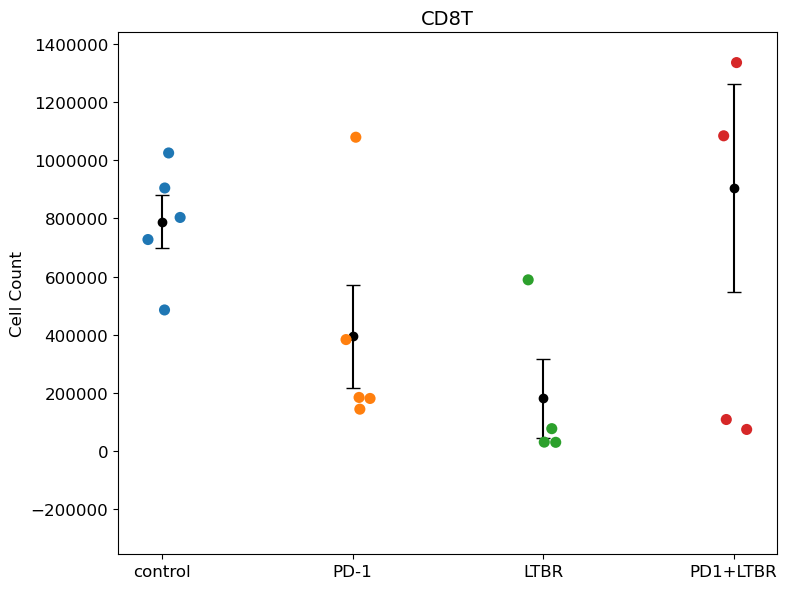

In [3]:
for column in cell_type:
    plt.figure(figsize=(8,6))  # adjust the figure size
    sns.stripplot(x='Group', y=column, data=data, jitter=True, order=groups, size=8)  # adjust dot size
    means = [data[data['Group'] == group][column].mean() for group in groups]
    errors = [data[data['Group'] == group][column].sem() for group in groups]
    plt.errorbar(x=range(len(groups)), y=means,
                 yerr=errors, fmt='o', color='black', capsize=5)  
    plt.ylabel('Cell Count', fontsize=12)
    plt.xticks(range(len(groups)), groups, fontsize=12)  
    plt.ticklabel_format(style='plain', axis='y')
    plt.tick_params(axis='y', labelsize=12)  
    ymin = min(means) - 1.5*max(errors) 
    ymax = max(means) + 1.5*max(errors)
    plt.ylim([ymin, ymax])
    plt.title(column, fontsize=14)
    plt.xlabel('')  # remove x-label
    plt.tight_layout()  
    plt.savefig(column + '.png')

In [4]:
p_values = pd.DataFrame(columns=['Cell Type', 'Group 1', 'Group 2', 'p-value'])
for column in cell_type:
    for group1 in groups:
        for group2 in groups:
            if groups.index(group1) < groups.index(group2):
                f, p = f_oneway(data[data['Group'] == group1][column], data[data['Group'] == group2][column])
                p_values = p_values.append({'Cell Type': column, 'Group 1': group1, 'Group 2': group2, 'p-value': p}, ignore_index=True)
p_values.to_excel('p_values.xlsx', index=False)

/var/folders/56/k3j8nxjs0yb5sl_rjhv3gggh0000gn/T/ipykernel_43071/749259320.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_values = p_values.append({'Cell Type': column, 'Group 1': group1, 'Group 2': group2, 'p-value': p}, ignore_index=True)
/var/folders/56/k3j8nxjs0yb5sl_rjhv3gggh0000gn/T/ipykernel_43071/749259320.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_values = p_values.append({'Cell Type': column, 'Group 1': group1, 'Group 2': group2, 'p-value': p}, ignore_index=True)
/var/folders/56/k3j8nxjs0yb5sl_rjhv3gggh0000gn/T/ipykernel_43071/749259320.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_values = p_values.append({'Cell Type': column, 'Group 1': group1, 'Group 2': group2, 'p-value': p}, ignore_i